In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

1. Converta os países do dataframe abaixo para variáveis dummies eliminando a primeira coluna e utilizando 'Country' como prefixo no nome das colunas.

In [2]:
ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Brasil', 'Argentina', 'Peru', 'Bolívia', 'Uruguai']
sales = [42, 53, 37, 45, 20]

df = pd.DataFrame(list(zip(ids, countries, sales)),
                  columns=['Ids', 'Countries', 'Sales'])
df.head()

,Ids,Countries,Sales
0,11,Brasil,42
1,22,Argentina,53
2,33,Peru,37
3,44,Bolívia,45
4,55,Uruguai,20


In [21]:
df_dummy = pd.get_dummies(df, columns=['Countries'], drop_first=True, prefix='Country')
df_dummy

,Ids,Sales,Country_Bolívia,Country_Brasil,Country_Peru,Country_Uruguai
0,11,42,0,1,0,0
1,22,53,0,0,0,0
2,33,37,0,0,1,0
3,44,45,1,0,0,0
4,55,20,0,0,0,1


2. Considere os dados do arquivo "german_credit.csv" que contem dados de empréstimos realizados por um banco.<br> <br>
a. Tem nulos nesse df? Se sim, preencha os nulos da forma que o grupo decidir.

In [22]:
df_german = pd.read_csv("./Lets_Code_DS_Degree_Alunos/Módulo 3 - Pandas/data/german_credit.csv", sep=',')
df_german.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [23]:
df_german.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [26]:
df_german['Saving accounts'].fillna( df_german['Saving accounts'].mode()[0], inplace=True)
df_german['Checking account'].fillna( df_german['Checking account'].mode()[0], inplace=True)
df_german.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [27]:
df_german.head(15)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,little,little,9055,36,education
6,6,53,male,2,own,quite rich,little,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,little,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


   b. Converta as variáveis categóricas em numéricas.

In [28]:
df_ger_dum = pd.get_dummies(df_german, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)
df_ger_dum

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,1,1736,12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
996,996,40,3,3857,30,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
997,997,38,2,804,12,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,998,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


3. Para esse exercício vamos considerar o dataset https://archive.ics.uci.edu/ml/datasets/automobile que traz a especificação de modelos de carros em 1985.
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [31]:
# Considere a seguinte lista como o nome das colunas do dataset
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [35]:
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
df_car.columns = headers
df_car.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


a. Esse dataset possui nans? Se sim, o grupo precisa entrar em um acordo de como tratá-los.

In [36]:
df_car.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [37]:
df_car.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [55]:
for col in headers:
    print(f'{col} \n {df_car[col].unique()} \n')

symboling 
 [ 3  1  2  0 -1 -2] 

normalized_losses 
 [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.] 

make 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo'] 

fuel_type 
 ['gas' 'diesel'] 

aspiration 
 ['std' 'turbo'] 

num_doors 
 ['two' 'four' nan] 

body_style 
 ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drive_wheels 
 ['rwd' 'fwd' '4wd'] 

engine_location 
 ['front' 'rear'] 

wheel_base 
 [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2

In [48]:
# Algumas colunas possuem caracter '?'
df_car.isin(['?']).sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [50]:
df_car.replace('?', np.nan, inplace=True)
df_car.isin(['?']).sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [59]:
df_car['num_doors'].replace({'two':2, 'four':4}, inplace=True)

In [60]:
cols = ['bore', 'stroke', 'normalized_losses', 'horsepower', 'peak_rpm', 'price']

for col in cols:
    df_car[col] = pd.to_numeric(df_car[col], errors='coerce')

In [61]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_doors          202 non-null    float64
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_cylinders      204 non-null    object 
 16  engine_size        204 non

In [58]:
df_car.isna().sum()

symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

C:\Users\mmm_n\AppData\Local\Temp/ipykernel_10092/3888584112.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_car.corr(), dtype=np.bool))


<AxesSubplot:>

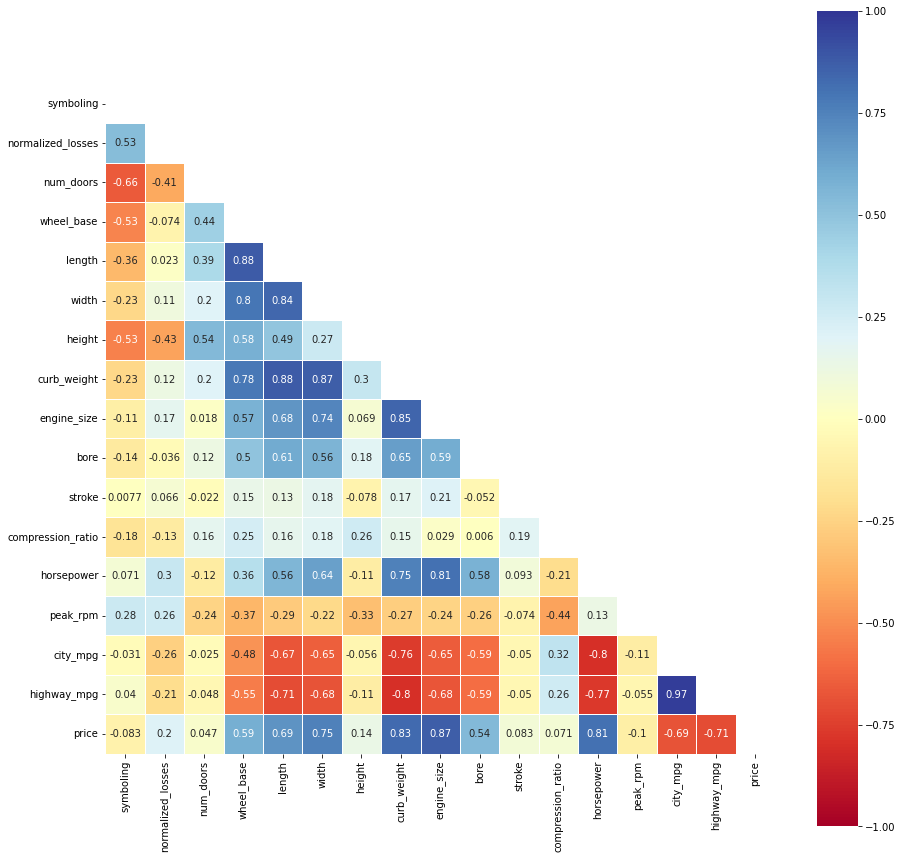

In [62]:
mask = np.triu(np.ones_like(df_car.corr(), dtype=np.bool))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_car.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

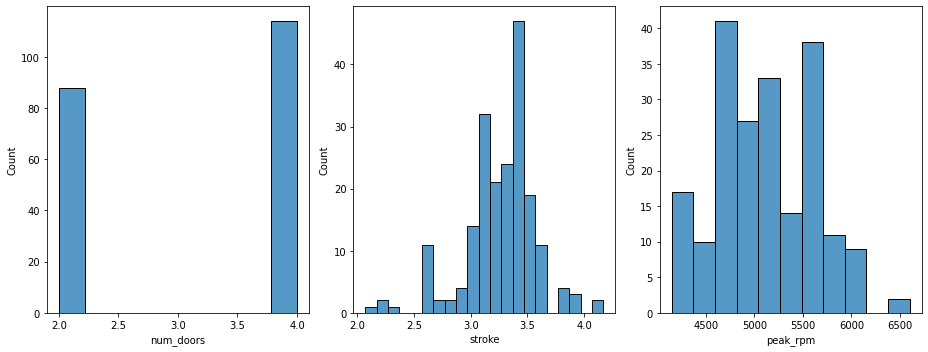

In [74]:
cols = ['num_doors', 'stroke', 'peak_rpm']

f, axes = plt.subplots(1, 3, figsize=(13,5))  
y=0

for col in cols:
    sns.histplot(x = col, data = df_car, ax = axes[y])
    y+=1

plt.tight_layout()
plt.show()

In [91]:
df_car.pivot_table(values='engine_type', index='body_style', columns='num_doors', aggfunc='count')

num_doors,2.0,4.0
body_style,,
convertible,5.0,NaN
hardtop,8.0,NaN
hatchback,60.0,10.0
sedan,15.0,79.0
wagon,NaN,25.0


In [ ]:
# Estratégias fillna
# NAN   Coluna              Correlação              Estratégia
# 40    normalized_losses   -                       média
# 2     num_doors           -                       como ambas as linhas são de sedan, colocaremos 4 portas, já que é a maioria
# 4     bore                curb_weight             sort > interpolate
# 4     stroke              -                       média
# 2     horsepower          engine_size             sort > interpolate
# 2     peak_rpm            -                       média
# 4     price               engine_size             sort > interpolate

In [92]:
df_car['normalized_losses'].fillna(df_car['normalized_losses'].mean(), inplace=True)
df_car['num_doors'].fillna(4, inplace=True)
df_car['stroke'].fillna(df_car['stroke'].mean(), inplace=True)
df_car['peak_rpm'].fillna(df_car['peak_rpm'].mean(), inplace=True)

df_car.sort_values(by='engine_size', inplace=True)
df_car['horsepower'].fillna(df_car['horsepower'].interpolate(), inplace=True)
df_car['price'].fillna(df_car['price'].interpolate(), inplace=True)

df_car.sort_values(by='curb_weight', inplace=True)
df_car['bore'].fillna(df_car['bore'].interpolate(), inplace=True)

In [93]:
df_car.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

b. Esse dataset possui linhas duplicadas?

In [94]:
df_car.duplicated().sum()

0

c. O consumo dos automóveis na cidade e rodovia, representados pelas colunas "city-mpg" e "highway-mpg" respectivamente, estão na unidade mpg (miles per gallon). Converta essas colunas para consumo em L/100km sabendo que a conversão é dada por:

L/100km = 235 / mpg 

In [95]:
df_car['city_Lkm'] = 235 / df_car['city_mpg']
df_car['highway_Lkm'] = 235 / df_car['highway_mpg']

df_car.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_Lkm,highway_Lkm
17,2,121.0,chevrolet,gas,std,2.0,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0,5.000000,4.433962
29,2,137.0,honda,gas,std,2.0,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0,4.795918,4.351852
30,2,137.0,honda,gas,std,2.0,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0,7.580645,6.184211
31,1,101.0,honda,gas,std,2.0,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0,6.184211,5.595238
18,1,98.0,chevrolet,gas,std,2.0,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0,6.184211,5.465116


d. Converta as colunas "body_style" e "drive_wheels" para variáveis dummies.

In [96]:
df_car_dum = pd.get_dummies(df_car, columns=['body_style', 'drive_wheels'], drop_first=True)

df_car_dum.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_Lkm,highway_Lkm,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
17,2,121.0,chevrolet,gas,std,2.0,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0,5.000000,4.433962,0,1,0,0,1,0
29,2,137.0,honda,gas,std,2.0,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0,4.795918,4.351852,0,1,0,0,1,0
30,2,137.0,honda,gas,std,2.0,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0,7.580645,6.184211,0,1,0,0,1,0
31,1,101.0,honda,gas,std,2.0,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0,6.184211,5.595238,0,1,0,0,1,0
18,1,98.0,chevrolet,gas,std,2.0,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6295.0,6.184211,5.465116,0,1,0,0,1,0
